<a href="https://colab.research.google.com/github/daniel542813x/deepLearning/blob/main/RedNeuronalConNumpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.datasets import make_gaussian_quantiles

In [2]:
N = 1000
gaussian_quantiles= make_gaussian_quantiles(mean=None,
                        cov=0.1,
                        n_samples=N,
                        n_features = 2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None
                        )
X , Y = gaussian_quantiles

In [33]:
Y = Y[:,np.newaxis]
X.shape

(1000, 2)

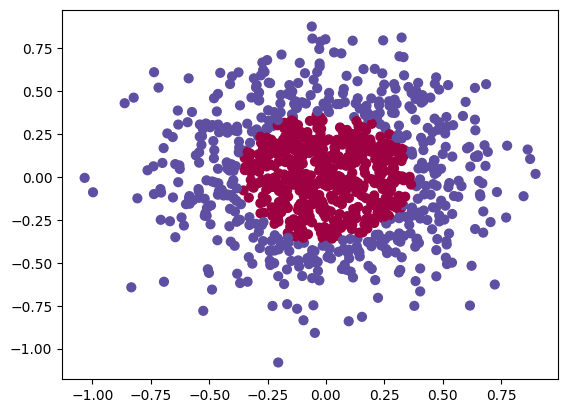

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y[:,0],s=40,cmap=plt.cm.Spectral)

In [5]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x <= 0] = 0
        x[x > 0 ] = 1
        return x
    else:
        return np.maximum(0, x)

def mse(y,y_hat,derivate=False):
  if derivate:
    return (y_hat -y )
  else:
    return np.mean((y_hat - y )**2)

In [115]:
def initialize_parameters_deep(layers_dim):
  parameters = {}
  L = len(layers_dim)
  for l in range(0,L-1):
    parameters['W' + str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1]) * 2) -1
    parameters['b' + str(l+1)] = (np.random.rand(1,layers_dim[l+1]) * 2) -1
  return parameters

In [126]:
layers_dim=[2,4,8,1]
params = initialize_parameters_deep(layers_dim)
params

{'W1': array([[ 0.38031972, -0.55917567,  0.90098095, -0.8410284 ],
        [ 0.22648025,  0.5200329 , -0.70971041, -0.43536676]]),
 'b1': array([[ 0.43515983, -0.6074364 ,  0.80910282,  0.91411999]]),
 'W2': array([[-0.38362278,  0.0902497 , -0.82530291, -0.4756933 ,  0.12985148,
         -0.86407297,  0.05675166,  0.79723093],
        [ 0.51069917, -0.64853983,  0.08688523, -0.45164595,  0.81162293,
          0.77923819,  0.20964501,  0.67843417],
        [-0.2176918 ,  0.29889482, -0.77063492,  0.37901277, -0.33371273,
         -0.08694939, -0.89419027, -0.45676595],
        [ 0.14165828,  0.48372772, -0.02890151, -0.53333398, -0.73707795,
         -0.59939072,  0.48922572,  0.78268145]]),
 'b2': array([[ 0.24659014,  0.52876887, -0.57090078, -0.51566344,  0.08883481,
          0.86568448,  0.12489748,  0.98198653]]),
 'W3': array([[-0.10238826],
        [-0.19328768],
        [-0.11753406],
        [ 0.89647139],
        [-0.76803385],
        [ 0.98561732],
        [ 0.9294584 ],


In [127]:
def forward(params):
  params['A0']=X
  for l in range(1,len(layers_dim)-1):
    params[f'Z{l}'] = np.matmul(params[f'A{l-1}'],params[f'W{l}']) + params[f'b{l}']
    params[f'A{l}'] = relu(params[f'Z{l}'])
  params[f'Z{len(layers_dim)-1}'] = np.matmul(params[f'A{len(layers_dim)-2}'],params[f'W{len(layers_dim)-1}']) + params[f'b{len(layers_dim)-1}']
  params[f'A{len(layers_dim)-1}']=sigmoid(params[f'Z{len(layers_dim)-1}'])
  return params[f'A{len(layers_dim)-1}']


In [128]:
output = forward(params)
output.shape

(1000, 1)

In [129]:
#Calcutale derivates

params['dZ3'] = mse(Y,output,True) * sigmoid(params['A3'],True)
params['dW3'] = params['A2'].T@params['dZ3']

params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
params['dW2'] = params['A1'].T@params['dZ2']

params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
params['dW1'] = params['A0'].T@params['dZ1']

lr= 0.05

# update weigtes

params['W3'] = params['W3']-params['dW3'] * lr
params['b3'] = params['b3']-(np.mean(params['dW3'],axis=0,keepdims=True) ) * lr

params['W2'] = params['W2']- params['dW2'] * lr
params['b2'] = params['b2'] - (np.mean(params['dW2'],axis=0,keepdims=True) ) * lr

params['W1'] = params['W1']-params['dW1'] * lr
params['b1'] = params['b1']-(np.mean(params['dW1'],axis=0,keepdims=True) ) * lr